## Imports 
cv2 - an Image processing library (Image2Image)  
PIL - an Image processing library (Image2Image)  
matplotlib - a library to display data  

In [1]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np


## Virtual Environment

In [2]:
import sys
import os
print(sys.executable)
CONDA_PATH = "/home/codebind/Desktop/Computer Vision/"
CONDA_PATH_IMG = os.path.join(CONDA_PATH,'Img/')

/home/codebind/miniconda3/envs/ComputerVision/bin/python


### RGB-BGR
**matplotlib interprets images in RGB format, but OpenCV uses BGR format
so to convert the image so that it's properly loaded, convert it before loading**  
using: cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)

In [3]:
def print_image(in_img):
    print(f'Type: {type(in_img)}\nShape [h,w,ch]: {in_img.shape}\nSize [pixels]: {in_img.size}\ndtype: {in_img.dtype}\n')
    plt.imshow(in_img)

Type: <class 'numpy.ndarray'>
Shape [h,w,ch]: (219, 230, 3)
Size [pixels]: 151110
dtype: uint8

Type: <class 'numpy.ndarray'>
Shape [h,w,ch]: (219, 230, 3)
Size [pixels]: 151110
dtype: uint8



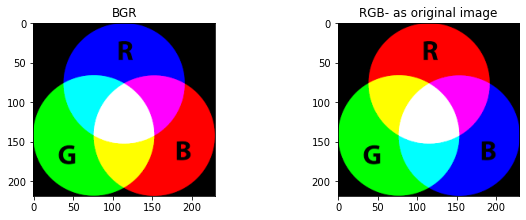

In [4]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2
# load image
rgb_path = os.path.join(CONDA_PATH_IMG,'RGB.png')
img_bgr = cv2.imread(rgb_path)
# BGR
fig.add_subplot(rows, columns, 1)
plt.title("BGR")
print_image(img_bgr)
# Convert
fig.add_subplot(rows, columns, 2)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# RGB
plt.title("RGB- as original image")
print_image(img_rgb)

(-0.5, 229.5, 218.5, -0.5)

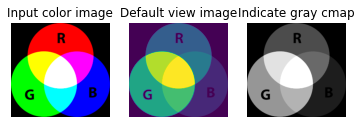

In [5]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Input color image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_gray)
plt.title("Default view image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_gray, cmap = plt.cm.gray)
plt.title("Indicate gray cmap")
plt.axis('off')

## Load an Image
- cv2.waitKey(0)- wait until the image is loading so we avoid the showing of black window.
- cv2.imread(PATH) - load the image from directed path
![title](Img/messi_ball.jpg)

In [59]:
messi_path = os.path.join(CONDA_PATH_IMG,'messi_ball.jpg')
img_messi = cv2.imread(messi_path)

In [60]:
# cv2.imshow("original", img)
# #To show the image it's nessecary to use this line below
# cv2.waitKey(0)

Type: <class 'numpy.ndarray'>
Shape [h,w,ch]: (900, 1200, 3)
Size [pixels]: 3240000
dtype: uint8



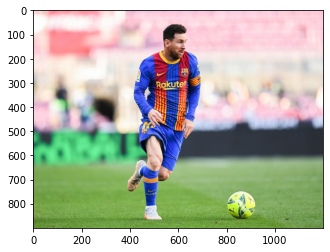

In [61]:
# plt.subplot(2,1,1)
img_messi = cv2.cvtColor(img_messi, cv2.COLOR_BGR2RGB)
print_image(img_messi)

## Crop
**cropped = img[start_row:end_row, start_col:end_col]**  
- The first dimension is always the number of rows or the height of the image.  
- The second dimension is the number of columns or the width of the image. 

(-0.5, 22.5, 36.5, -0.5)

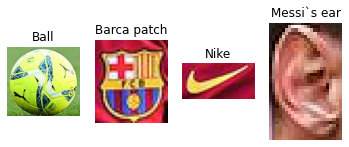

In [62]:
cropped_ball = img_messi[745:863, 800:925] # Slicing to crop the image
plt.subplot(1,4,1)
plt.title('Ball')
plt.imshow(cropped_ball)
plt.axis('off')

cropped_patch = img_messi[235:275, 610:645] # Slicing to crop the image
plt.subplot(1,4,2)
plt.title('Barca patch')
plt.imshow(cropped_patch)
plt.axis('off')

cropped_nike = img_messi[255:275, 510:550] # Slicing to crop the image
plt.subplot(1,4,3)
plt.title('Nike')
plt.imshow(cropped_nike)
plt.axis('off')

cropped_ear = img_messi[119:156, 542:565] # Slicing to crop the image
plt.subplot(1,4,4)
plt.title('Messi`s ear')
plt.imshow(cropped_ear)
plt.axis('off')

## Draw Rectangles
**cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)** 

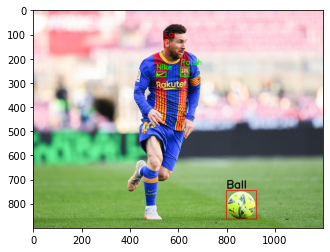

In [67]:
cv2.rectangle(img_messi, (800, 745), (925, 863), (255,0,0), 2)
cv2.putText(img_messi, 'Ball', (800, 735), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,0), 3)

cv2.rectangle(img_messi, (610, 235), (645, 275), (0,255,0), 2)
cv2.putText(img_messi, 'Patch', (610, 225), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

cv2.rectangle(img_messi, (510, 255), (550, 275), (0,255,0), 2)
cv2.putText(img_messi, 'Nike', (510, 245), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

cv2.rectangle(img_messi, (542, 119), (565, 156), (255,0,0), 2)
cv2.putText(img_messi, 'Ear', (542, 109), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.imshow(img_messi)

[900, 1200, 3]
(900, 1, 3)


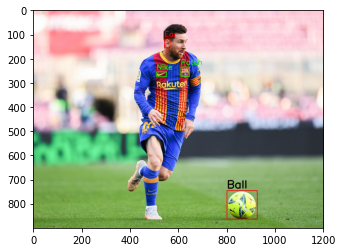

In [79]:
shape = img_messi.shape
shape = list(shape)
print(shape)
#axis dimmension
blank_image = np.zeros([900,1,3],np.uint8)
print(blank_image.shape)
img = np.concatenate((img_messi, blank_image), axis=1)

plt.imshow(img)

## Captioning an image -
- First I'll add an empty row above the picture  
    - using: np.concatenate(our_img,blank_img, axis=1)
- I'll add text on empty row coordinates

In [ ]:
shape[1] = 1
blank_image = np.zeros(tuple(shape), np.float32)
img = np.concatenate((img_messi, blank_image), axis=1)
plt.imshow(img_messi)

In [ ]:

shape = tuple(shape)
blank_image = np.zeros(shape, np.float32)

## Convert to PIL format

## Convert to numpy format